<a href="https://colab.research.google.com/github/shailenderacc/MastersDS/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from sklearn.tree import DecisionTreeClassifier
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("kidney_disease.csv")

In [6]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [8]:
df.shape

(400, 26)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [10]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

The ckd/t is mentioned wrongly, which must be mentioned as ckd. Hence i have replaced the ckd\t values to ckd in the dataset

In [12]:
df['classification']=df['classification'].replace('ckd\t','ckd')
df['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

Id column is not needed for diagnosis, hence it is eliminated


In [13]:
df.drop('id', axis=1, inplace=True)

In [14]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [15]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [16]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [17]:
# Remnaming the columns
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps','bacteria',
              'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin','packed_cell_volume', 'white_blood_cell_count',
              'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [18]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [19]:
df[[col for col in df.columns if df[col].dtype == 'object']]

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


In [21]:
columns_to_convert = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [22]:
df[[col for col in df.columns if df[col].dtype == 'object']]

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [23]:
# separating object & numeric columns
cat_cols = [col for col in df.columns if df[col].dtype =='object']
num_cols = [col for col in df.columns if df[col].dtype!='object']

In [24]:
cat_cols, num_cols

(['red_blood_cells',
  'pus_cell',
  'pus_cell_clumps',
  'bacteria',
  'hypertension',
  'diabetes_mellitus',
  'coronary_artery_disease',
  'appetite',
  'pedal_edema',
  'anemia',
  'class'],
 ['age',
  'blood_pressure',
  'specific_gravity',
  'albumin',
  'sugar',
  'blood_glucose_random',
  'blood_urea',
  'serum_creatinine',
  'sodium',
  'potassium',
  'hemoglobin',
  'packed_cell_volume',
  'white_blood_cell_count',
  'red_blood_cell_count'])

In [25]:
# calculate unique values of categorical col
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

appetite has ['good' 'poor' nan] values 

pedal_edema has ['no' 'yes' nan] values 

anemia has ['no' 'yes' nan] values 

class has ['ckd' 'notckd'] values 



In [26]:
df['diabetes_mellitus'].replace(to_replace = {'\tno': 'no', '\tyes': 'yes',' yes': 'yes'}, inplace = True)
df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no',inplace = True)

In [27]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' nan] values 

coronary_artery_disease has ['no' 'yes' nan] values 

appetite has ['good' 'poor' nan] values 

pedal_edema has ['no' 'yes' nan] values 

anemia has ['no' 'yes' nan] values 

class has ['ckd' 'notckd'] values 



In [28]:
df['class'].dtypes

dtype('O')

<ipython-input-29-869b183cf9e2>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-29-869b183cf9e2>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-29-869b183cf9e2>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in s

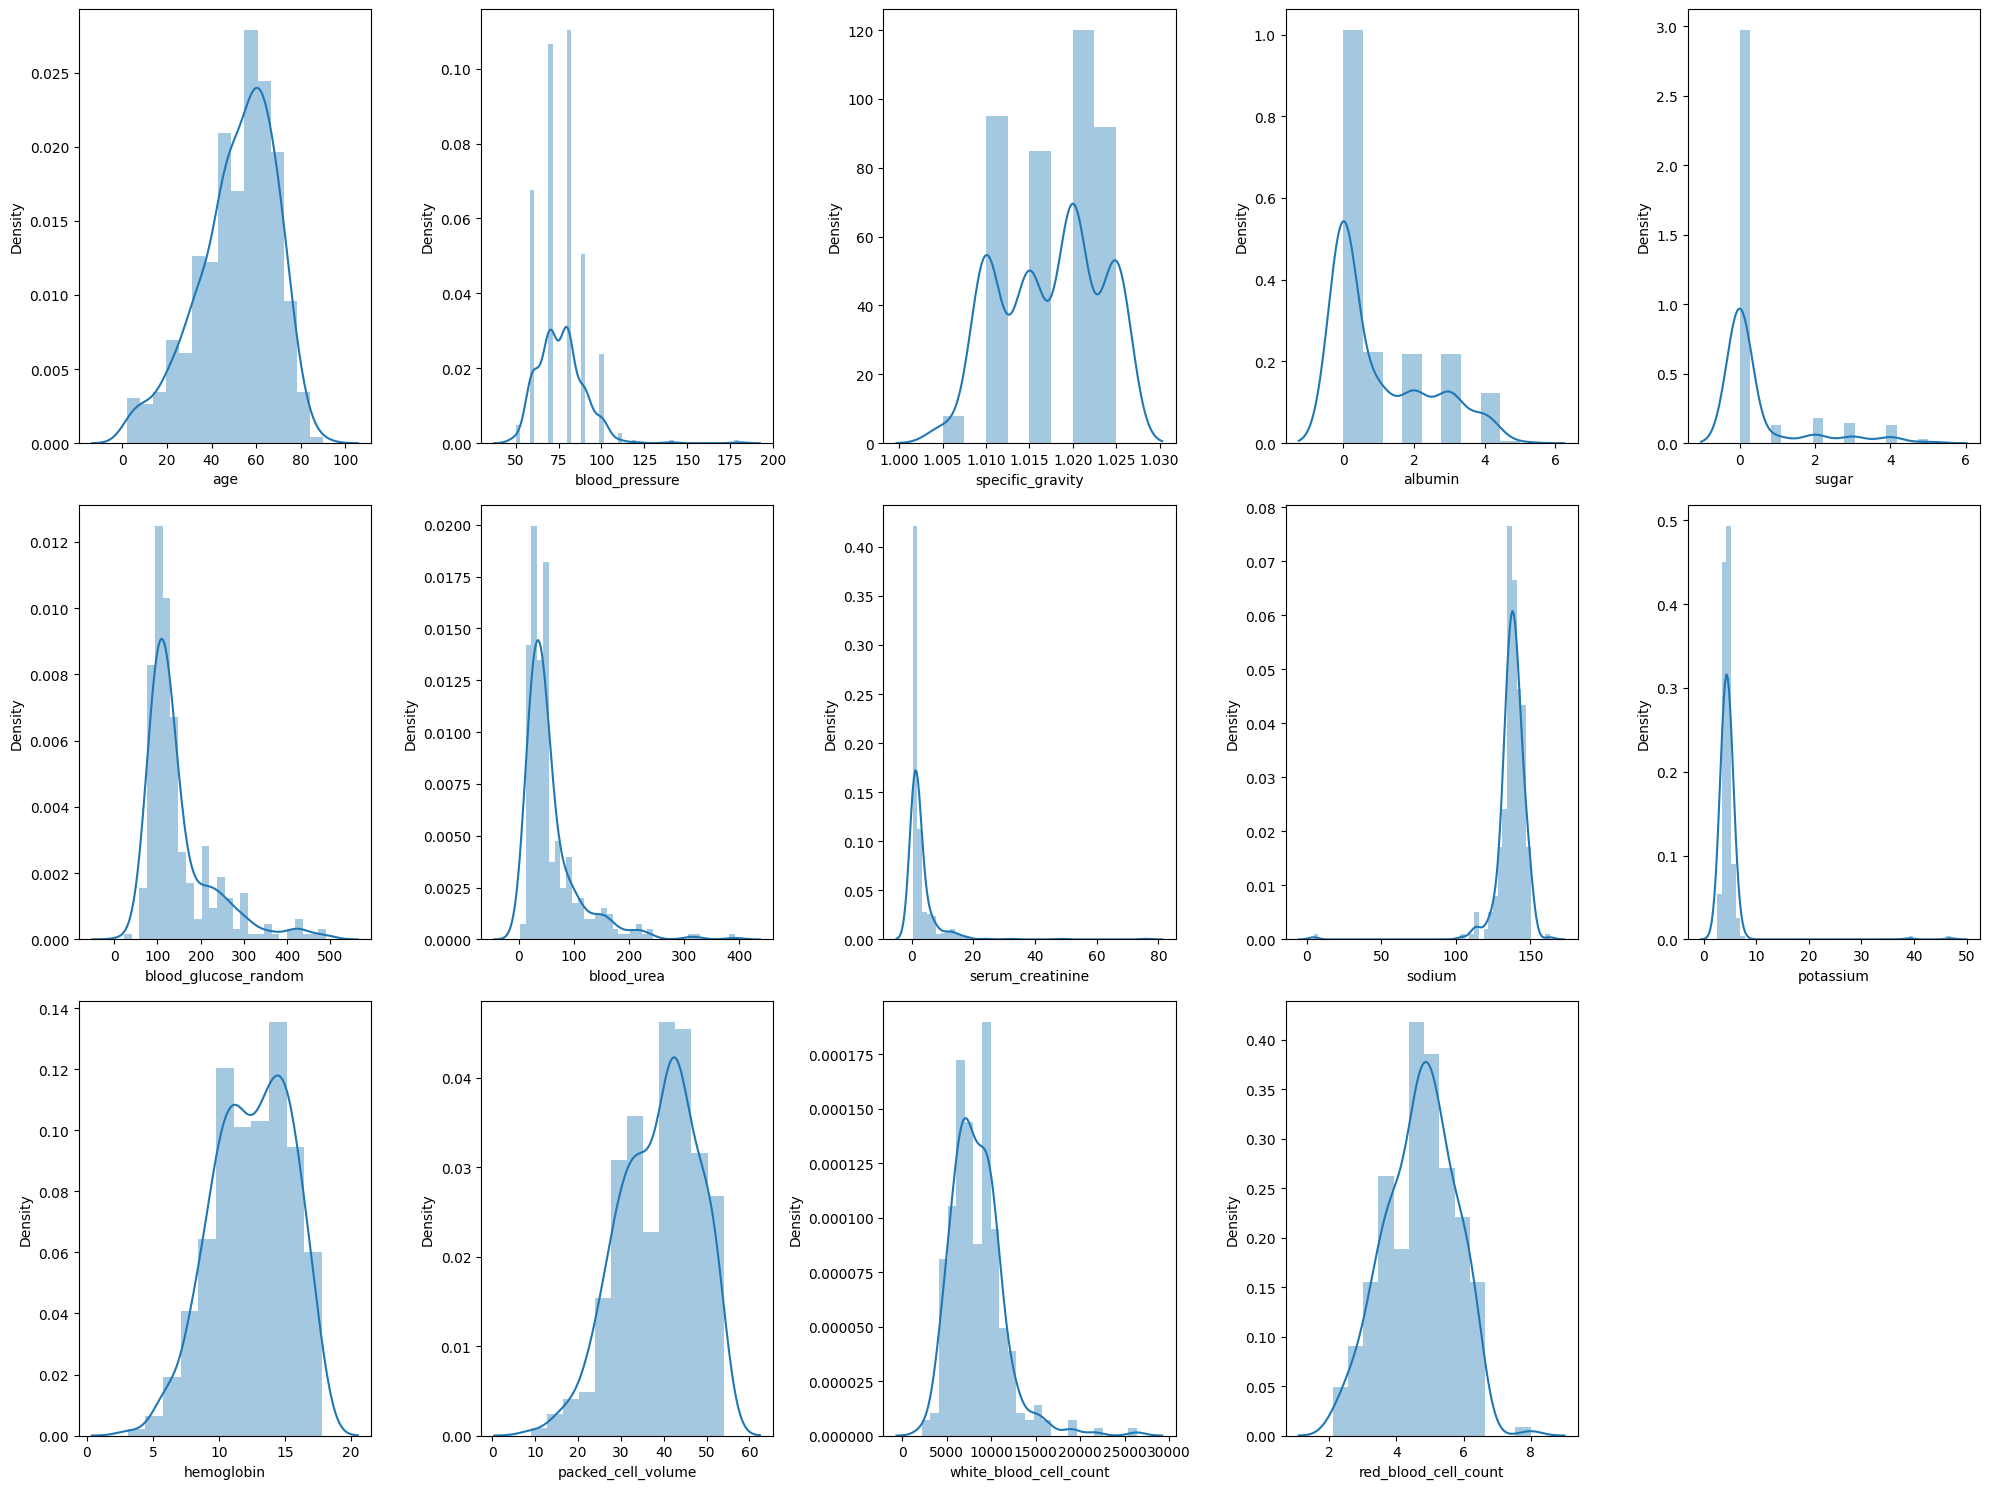

In [29]:
# Checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

# Data Cleaning

In [31]:
# Checking whether a dataset has a NaN value or not

df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

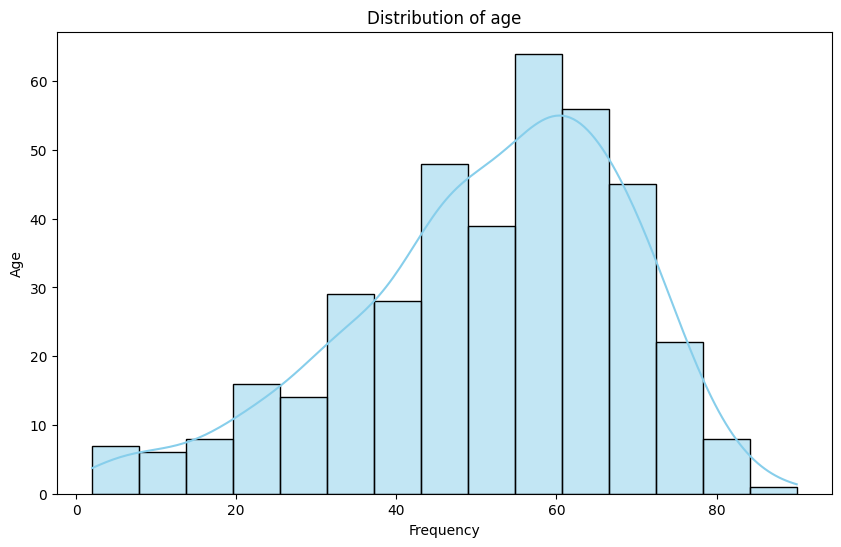

In [33]:
# univariate analysis

plt.figure(figsize = (10,6))
sns.histplot(df['age'].dropna(),kde = True,color = 'skyblue')
plt.title('Distribution of age')
plt.ylabel('Age')
plt.xlabel('Frequency')
plt.show()

In [34]:
df['hypertension'].unique()

array(['yes', 'no', nan], dtype=object)

<ipython-input-36-23954a10f99f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'hypertension', data =df, palette = 'viridis')


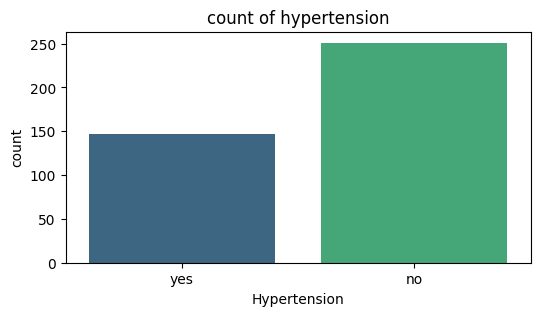

In [36]:
plt.figure(figsize = (6, 3))
sns.countplot(x = 'hypertension', data =df, palette = 'viridis')
plt.title('count of hypertension')
plt.xlabel('Hypertension')
plt.ylabel('count')
plt.show()

In [39]:
def kde(col):
    grid = sns.FacetGrid(df, hue = "class", height =4, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

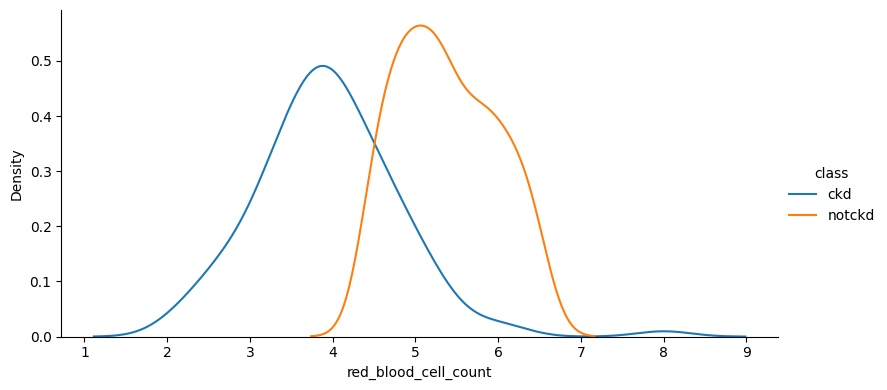

In [40]:
kde('red_blood_cell_count')

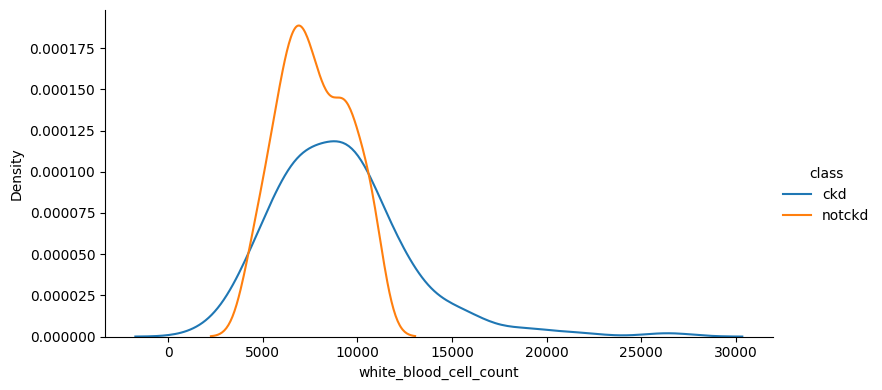

In [41]:
kde('white_blood_cell_count')

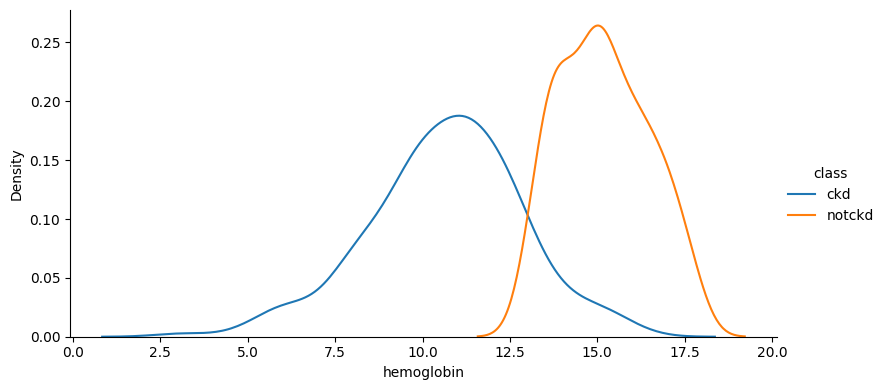

In [42]:
kde('hemoglobin')

In [43]:
from sklearn.preprocessing import LabelEncoder
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=LabelEncoder().fit_transform(df[i])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [44]:
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=5)
data_p=imp.fit_transform(df)
data_p=pd.DataFrame(data_p,columns=df.columns)
data_p.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

<Axes: >

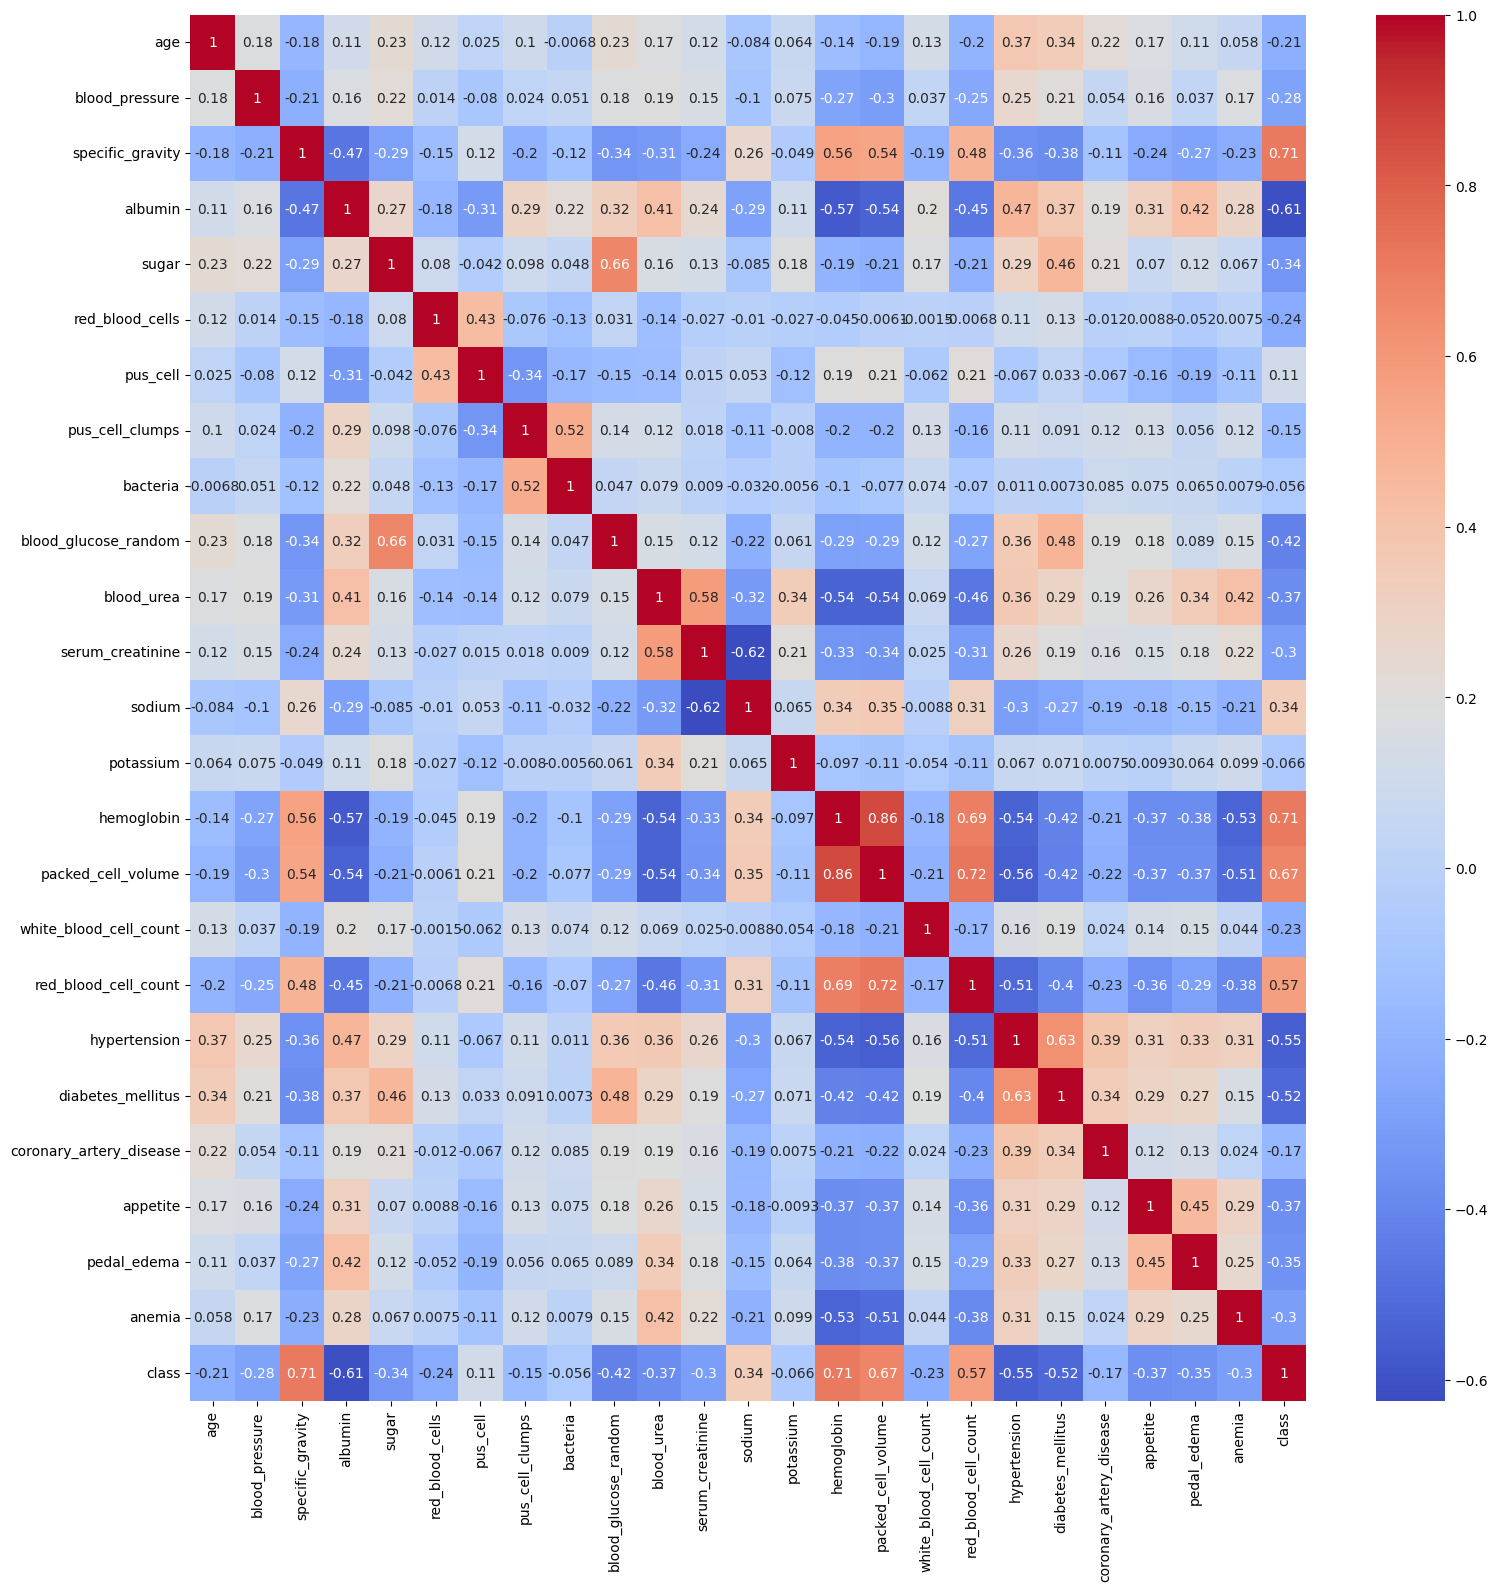

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
sns.heatmap(data_p.corr(),annot=True,cmap='coolwarm')